In [126]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [127]:
import cPickle
import sys
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from my_foos import Lin_Log_Bins

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

import seaborn as sns
sns.set_style("white", {'grid.color': '.0', 'grid.linestyle': '',\
                            'axes.grid': True,\
                            'xtick.direction': 'in',\
                            'xtick.major.size': 10,\
                            'xtick.minor.size': 10,\
                            'ytick.direction': 'in',\
                            'ytick.major.size': 10,\
                            'ytick.minor.size': 10,\
                            'xtick.label.size': 30,\
                            'xlabel.size': 30,\
                            'ylabel.size': 20,})

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

### Define the distributions parameters as measured in the other notebooks

In [128]:
CASE = "PRA"
InFile = "/home/ubi/DATA_PhD/TVN-ST/py/out/Calcolo/Auto_bins/PRA/00/data/DATA__p-000-444_thres_00_a15_k05_my-def_t-05_.dat"

In [129]:
DistParameters = {
    "PRA": {"kind": "truncated", "a_min": 6, "k_min": 2, "beta": .2, "a_norm": .7e-9, "a_lambda": 3.5e4, "a_alpha": 1.18489}
}

In [130]:
DATA = cPickle.load(gzip.open(InFile))

Acts = DATA["TOT"]["Vectors"]["aa"]
Degs = DATA["TOT"]["Vectors"]["kk"]

In [131]:
# PDFs for the activity...
PARAMS = DistParameters[CASE]

def lognormal_pdf(p, x):
    mu_k = parlogn[0]
    sigma_k = parlogn[1]
    A = p[0]
    return (A/x)*np.exp(-((np.log(x) - mu_k)**2.)/(2.*sigma_k**2.))

def stretched_pdf(p, x):
    A = p[0]
    Beta = parstretch[1]
    Lambda = parstretch[0]
    return A*(x**(Beta-1.))*np.exp(-(Lambda*(x**Beta)))

def trunc_pdf(p, x):
    A = p["a_norm"]
    Alpha = p["a_alpha"]
    Lambda = p["a_lambda"]
    return A*(x**(-Alpha))*np.exp(-(Lambda*x))

DistFunctions = {"lognormal": lognormal_pdf, "truncated": trunc_pdf, "stretched": stretched_pdf}
SelectedDistFunction = DistFunctions[PARAMS["kind"]]

In [132]:
a_bins = Lin_Log_Bins(Acts.min(), Acts.max(), factor=1.25)
k_bins = Lin_Log_Bins(Degs.min(), Degs.max(), factor=1.25)

a_freq, a_bins = np.histogram(Acts, bins=a_bins, density=False)
k_freq, k_bins = np.histogram(Degs, bins=k_bins, density=False)

a_PDF, a_bins = np.histogram(Acts, bins=a_bins, density=True)
k_PDF, k_bins = np.histogram(Degs, bins=k_bins, density=True)

a_cntrs = (a_bins[:-1] + a_bins[1:])/2.
k_cntrs = (k_bins[:-1] + k_bins[1:])/2.

In [133]:
print a_freq
print a_bins
print 
print k_freq
print k_bins

[9868 7952 4511 2994 1586 1723 1156 1013  802  636  509  393  318  220  149
  116   59   37   20   14    9    6]
[   0.5    2.5    4.5    6.5    8.5   10.5   13.5   16.5   20.5   25.5
   31.5   39.5   48.5   60.5   75.5   93.5  115.5  143.5  178.5  221.5
  274.5  341.5  423.5]

[11483  8982  6563  2835  1356   810   653   472   341   235   160    95
    44    27    26     9]
[   0.5    2.5    4.5    7.5   10.5   13.5   16.5   20.5   25.5   31.5
   39.5   49.5   60.5   75.5   93.5  116.5  144.5]


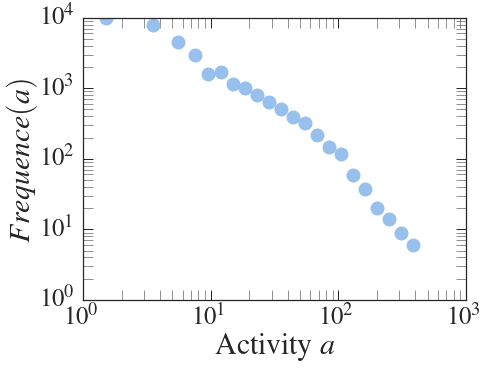

In [134]:
plt.figure(figsize=(6,4.5))

plt.loglog(a_cntrs, a_freq, 'o', color='#8CBBEA', alpha=.9, ms=14)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Activity $a$", size=30)
plt.ylabel(r"$Frequence(a)$", size=30)

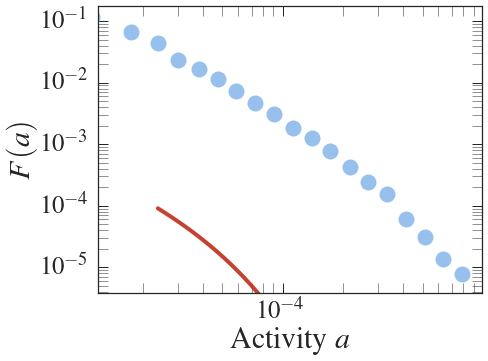

In [135]:
plt.figure(figsize=(6,4.5))

clean_as_cntr = a_cntrs[a_freq >= 10.]/Acts.sum()
clean_as_PDF  = a_PDF[a_freq >= 10.]

plt.loglog(clean_as_cntr, clean_as_PDF, 'o', color='#8CBBEA', alpha=.9, ms=16)

# plotting the pdf...
a_cntrs_pdf = clean_as_cntr[clean_as_cntr>= PARAMS["a_min"]/Acts.sum()]
a_cntrs_pdf = np.logspace(np.log10(a_cntrs_pdf.min()), np.ceil(np.log10(a_cntrs_pdf.max())), 50)
plt.loglog(a_cntrs_pdf, SelectedDistFunction(PARAMS, a_cntrs_pdf), '-', alpha=.9, lw=4, color='#bf2d19')

plt.xlim((clean_as_cntr.min() + PARAMS["a_min"]/Acts.sum())/2., clean_as_cntr.max()*1.25)
plt.ylim(clean_as_PDF.min()*.5, clean_as_PDF.max()*1.2)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Activity $a$", size=30)

plt.ylabel(r"$F(a)$", size=30)

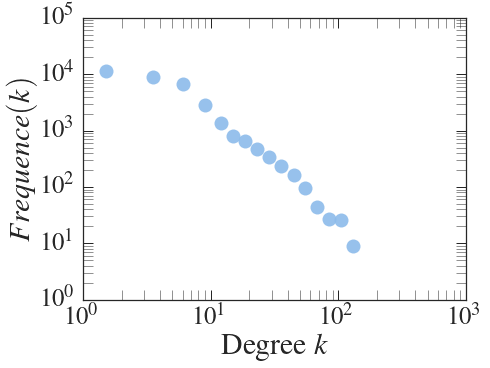

In [136]:
plt.figure(figsize=(6,4.5))

plt.loglog(k_cntrs, k_freq, 'o', color='#8CBBEA', alpha=.9, ms=14)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Degree $k$", size=30)
plt.ylabel(r"$Frequence(k)$", size=30)

In [137]:
# PDFs for the degree...
PARAMS = DistParameters[CASE]

Alpha  = PARAMS["a_alpha"]
Lambda = PARAMS["a_lambda"] 
Beta = PARAMS["beta"]

PARAMS["k_norm"] = .2
PARAMS["k_alpha"]  = ((Beta+1.)*Alpha - Beta)
PARAMS["k_lambda"] = .001223


def lognormal_k_pdf(p, x):
    mu_k = p[0]
    sigma_k = p[1]
    A = p[0]
    return (A/x)*np.exp(-((np.log(x) - mu_k)**2.)/(2.*sigma_k**2.))

def stretched_pdf(p, x):
    A = p[0]
    Beta = parstretch[1]
    Lambda = parstretch[0]
    return A*(x**(Beta-1.))*np.exp(-(Lambda*(x**Beta)))

def trunc_pdf(p, x):
    A = p["k_norm"]
    Alpha = p["k_alpha"]
    Lambda = p["k_lambda"]
    return A*(x**(-Alpha))*np.exp(-(Lambda*(x**(1.+Beta))))

DistFunctions = {"lognormal": lognormal_pdf, "truncated": trunc_pdf, "stretched": stretched_pdf}
SelectedDistFunction = DistFunctions[PARAMS["kind"]]

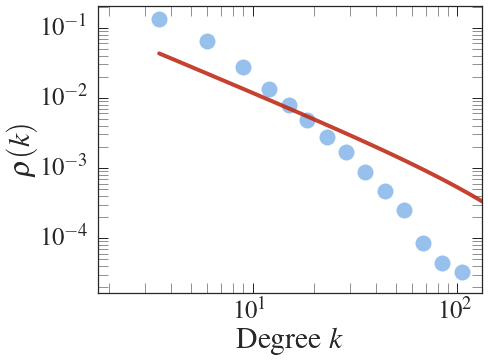

In [138]:
plt.figure(figsize=(6,4.5))

clean_ks_cntr = k_cntrs[k_freq >= 10.]
clean_ks_PDF  = k_PDF[k_freq >= 10.]

plt.loglog(clean_ks_cntr, clean_ks_PDF, 'o', color='#8CBBEA', alpha=.9, ms=16)

# plotting the pdf...

k_cntrs_pdf = clean_ks_cntr[clean_ks_cntr>= PARAMS["k_min"]]
k_cntrs_pdf = np.logspace(np.log10(k_cntrs_pdf.min()), np.ceil(np.log10(k_cntrs_pdf.max())), 50)
plt.loglog(k_cntrs_pdf, SelectedDistFunction(PARAMS, k_cntrs_pdf), '-', alpha=.9, lw=4, color='#bf2d19')

plt.xlim((clean_ks_cntr.min() + PARAMS["k_min"])/2., clean_ks_cntr.max()*1.25)
plt.ylim(clean_ks_PDF.min()*.5, clean_ks_PDF.max()*1.2)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Degree $k$", size=30)

plt.ylabel(r"$\rho(k)$", size=30)